In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
warnings.resetwarnings()

In [3]:
df=pd.read_csv('/kaggle/input/customer-data/OnlineRetail.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [7]:
current_date=pd.to_datetime('2012-01-01')

In [8]:
df.tail(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Calculating Recency of an individual Customer

In [9]:
max_date=df.groupby('CustomerID').max()[['InvoiceDate']]
max_date

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [10]:
rslt=current_date-max_date['InvoiceDate']
rslt

CustomerID
12346.0   347 days 13:43:00
12347.0    24 days 08:08:00
12348.0    97 days 10:47:00
12349.0    40 days 14:09:00
12350.0   332 days 07:59:00
                 ...       
18280.0   299 days 14:08:00
18281.0   202 days 13:07:00
18282.0    29 days 12:17:00
18283.0    25 days 11:58:00
18287.0    64 days 14:31:00
Name: InvoiceDate, Length: 4372, dtype: timedelta64[ns]

In [11]:
rslt=(current_date-max_date['InvoiceDate']).dt.days
rslt

CustomerID
12346.0    347
12347.0     24
12348.0     97
12349.0     40
12350.0    332
          ... 
18280.0    299
18281.0    202
18282.0     29
18283.0     25
18287.0     64
Name: InvoiceDate, Length: 4372, dtype: int64

In [12]:
max_date['Recency']=(current_date-max_date['InvoiceDate']).dt.days
max_date

,InvoiceDate,Recency
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [13]:
recency=max_date.drop('InvoiceDate',axis=1)
recency

,Recency
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


# Calculating Frequency of a specific Customer 

In [14]:
freq=df.drop_duplicates(subset='InvoiceNo')
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [15]:
max_freq=freq.groupby('CustomerID').count()[['InvoiceNo']]
max_freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


# Calculating Monetary for each customer

In [16]:
df['total']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [17]:
max_money=df.groupby(["CustomerID"])[["total"]].sum()
max_money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [18]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [19]:
RFM=pd.concat([recency,max_freq,max_money],axis=1)
RFM

,Recency,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [20]:
RFM.columns=['Recency','Frequency','Monetary']

In [21]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


# Standard Scaling 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map

In [23]:
scaled

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [24]:
scaled.shape

(4372, 3)

In [25]:
from sklearn.cluster import KMeans

# Find the optimal Value of K

In [26]:
import warnings
warnings.filterwarnings('ignore')
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(scaled)
    sse.append(km.inertia_)

In [27]:
sse

[13116.000000000002,
 9134.642381209183,
 5527.705358813834,
 4046.6395856924673,
 3020.2733516539765,
 2370.191605669824,
 1906.3446770979463,
 1585.5649930710322,
 1348.00676734437]

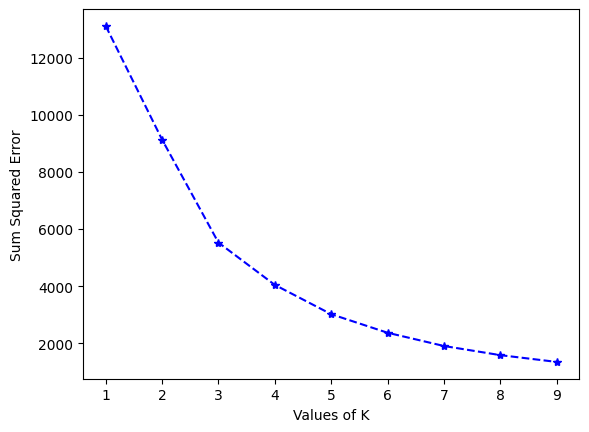

In [28]:
plt.plot(k_range,sse,'b--*')
plt.xlabel('Values of K')
plt.ylabel('Sum Squared Error')
plt.show()

# Object Creation and Data Fitting

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(RFM)

KMeans(n_clusters=3)

In [30]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [31]:
kmeans.labels_.shape

(4372,)

In [32]:
kmeans.labels_+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [33]:
RFM['Clusters']=(kmeans.labels_+1)

In [34]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,1


In [35]:
RFM['Clusters'].unique()

array([1, 3, 2], dtype=int32)

In [36]:
RFM[RFM['Clusters']==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,1


In [37]:
Final=RFM.groupby('Clusters').mean()[['Recency','Frequency','Monetary']]
Final

,Recency,Frequency,Monetary
Clusters,,,
1,114.088127,4.720433,1434.198064
2,25.000000,64.666667,241136.560000
3,29.347826,64.391304,58418.754348


In [42]:
def check(row):
    if row['Clusters']==3:
        return 'Diamond'
    elif row['Clusters']==1:
        return 'Gold'
    else:
        return 'Silver'

In [43]:
RFM['Group']=RFM.apply(check,axis=1)

In [44]:
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
12346.0,347,2,0.00,1,Gold
12347.0,24,7,4310.00,1,Gold
12348.0,97,4,1797.24,1,Gold
12349.0,40,1,1757.55,1,Gold
12350.0,332,1,334.40,1,Gold
...,...,...,...,...,...
18280.0,299,1,180.60,1,Gold
18281.0,202,1,80.82,1,Gold
18282.0,29,3,176.60,1,Gold


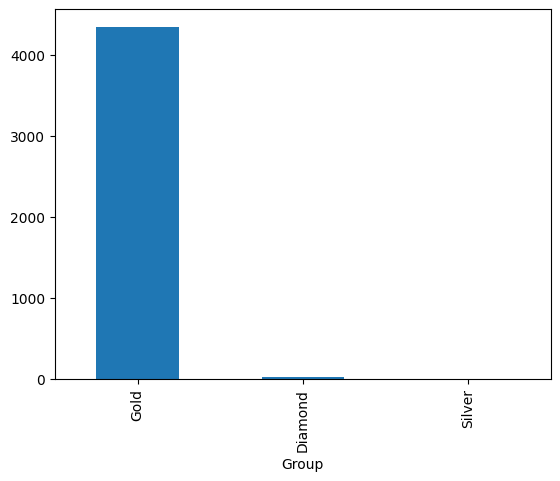

In [47]:
RFM['Group'].value_counts().plot(kind='bar')
plt.show()

In [49]:
result=RFM['Group'].value_counts()

<Axes: xlabel='Group'>

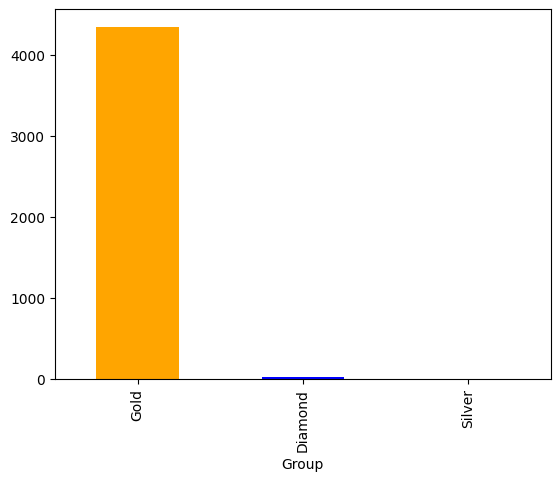

In [50]:
result.plot(kind='bar',color=['orange','blue','red'])